In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

from tensorflow import keras

from stesml.stes_model import stes_model

import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
plot = True

In [3]:
# Model names
# NN model truncated at t <= 360: 'NN_20220708-22'
# NN model for full run time: 'NN_20220708-23'
# XGBoost model for full run time 'XGBoost_20220709-08'
# XGBoost model truncated at t >= 360 'XGBoost_20220709-0914'

In [4]:
# Train the XGBoost model for t >= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'XGBoost_20220709-08'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = -1
truncated = False

In [5]:
train_model = False

if train_model:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_min=t_min)

In [6]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

In [7]:
load_model_and_addendum = True
    
if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [8]:
t_min = -1 # If building final model, set t_min to -1 here
h_results = validate_model(model, model_type, data_dir, target, scale, addendum, t_min)

RMSE: 4.8712523, R2: 0.9965206


In [9]:
h_df = h_results['val_df']

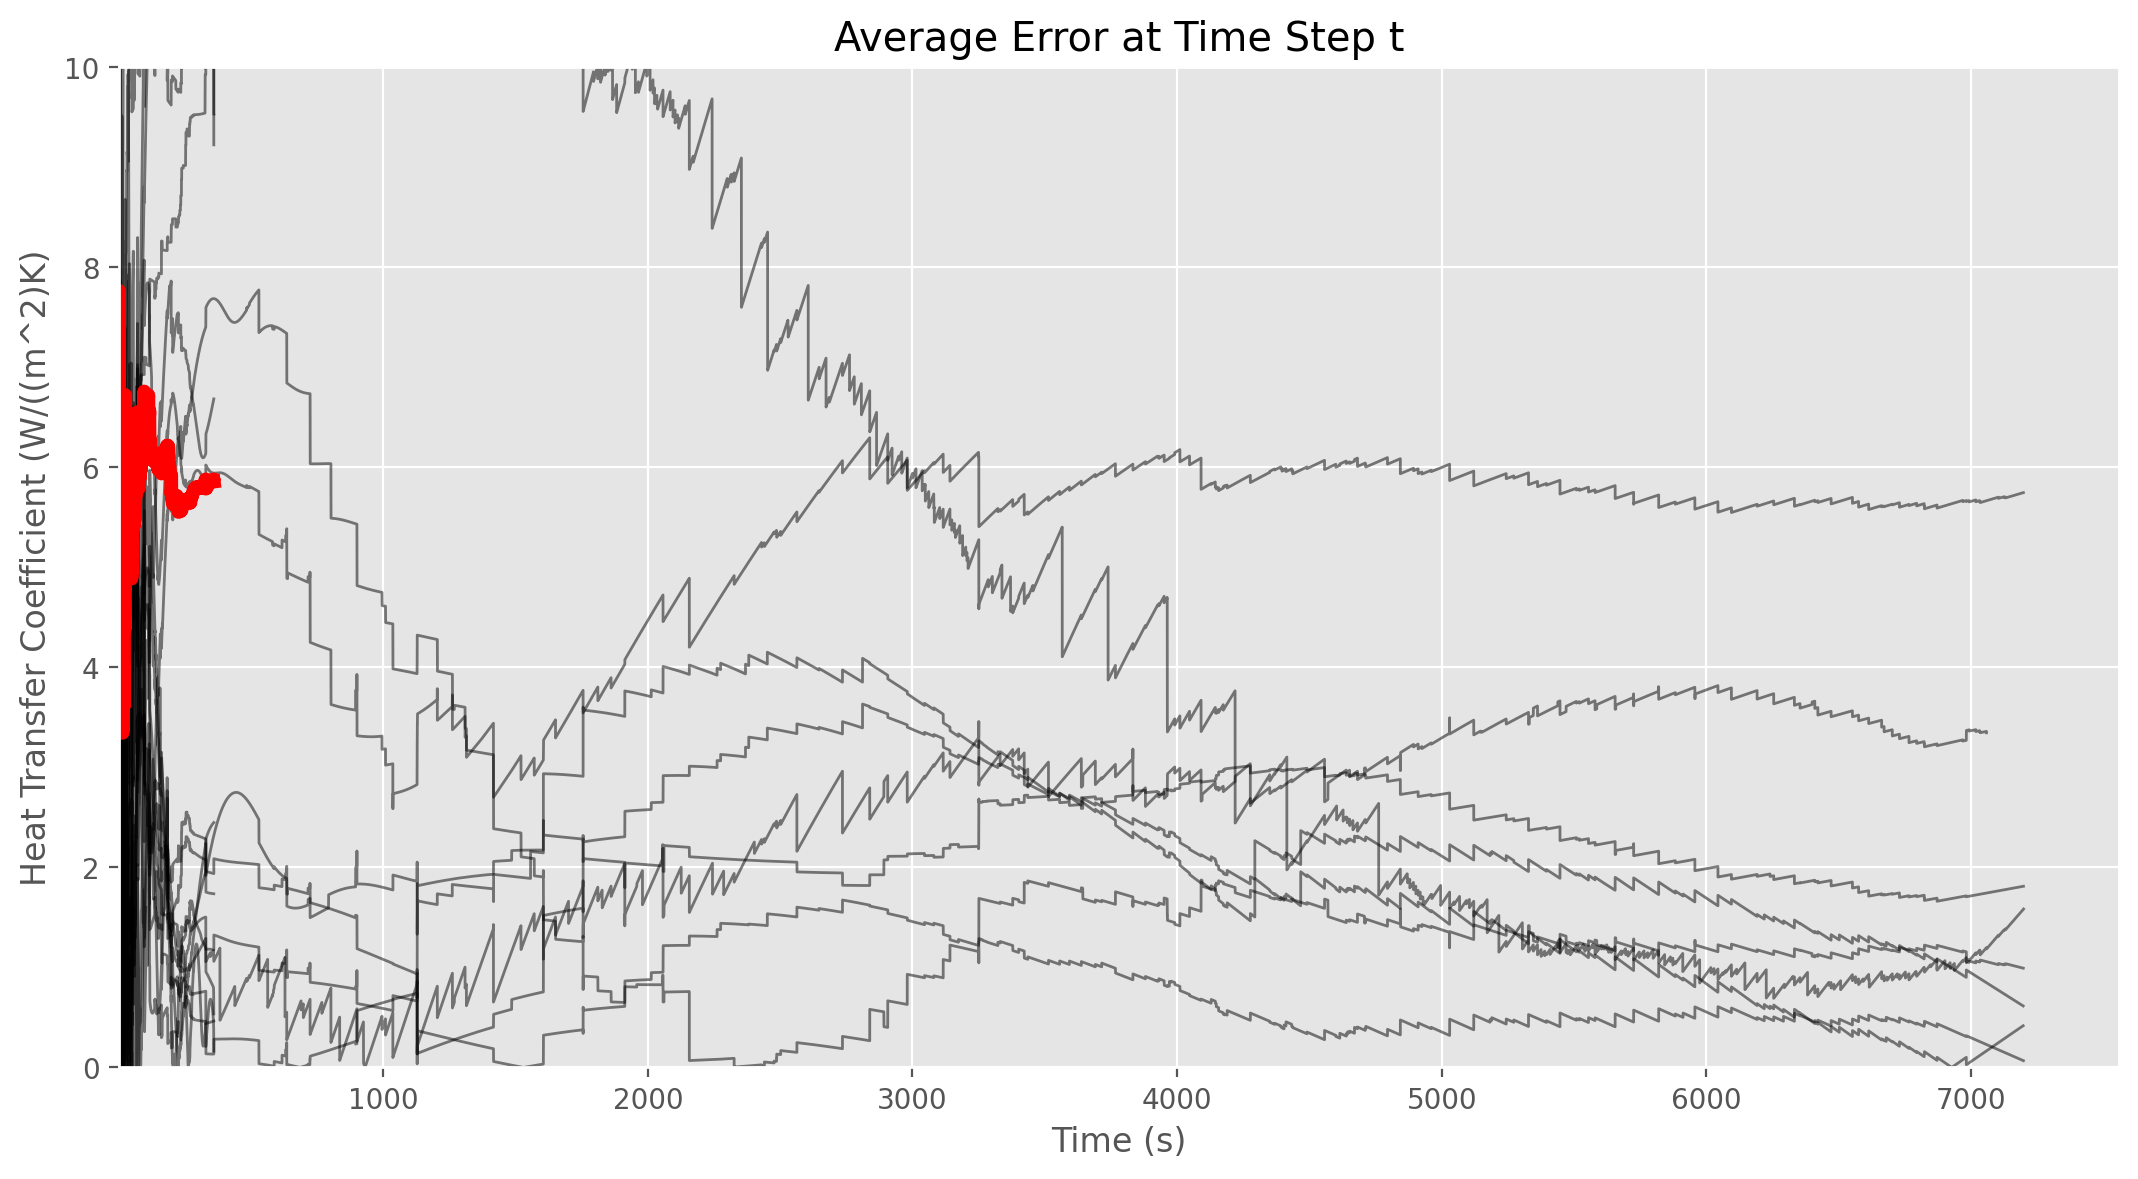

In [10]:
if plot:
    avg_error = plot_average_error(h_df, target=target, t_min=t_min)

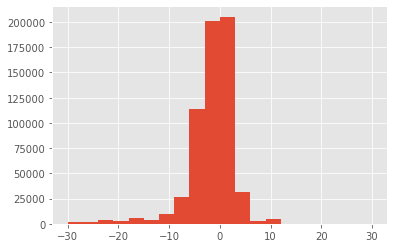

In [11]:
if plot:
    (h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

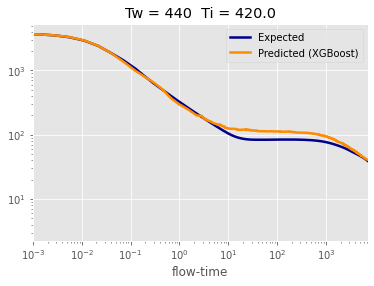

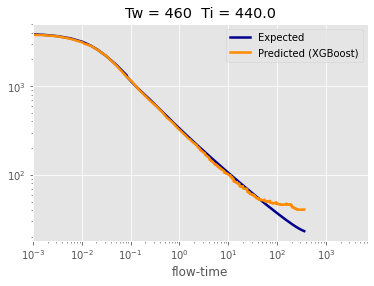

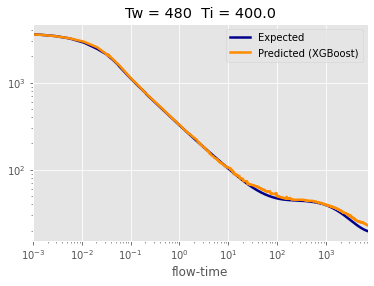

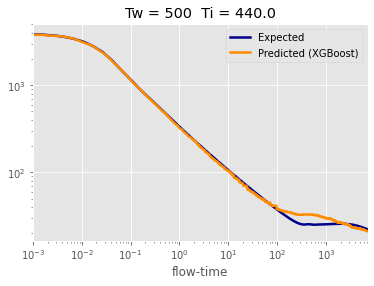

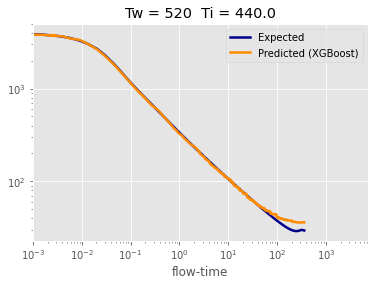

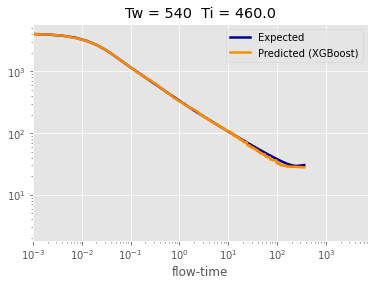

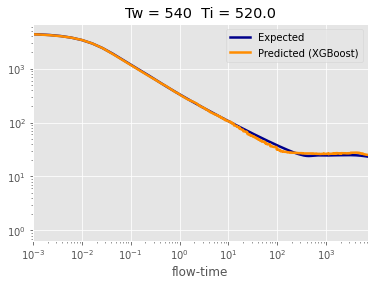

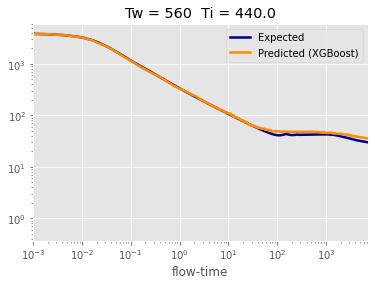

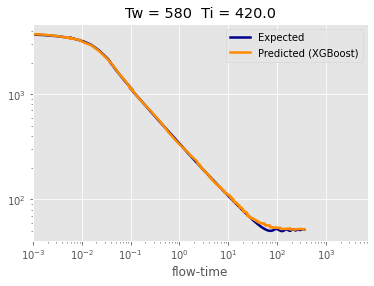

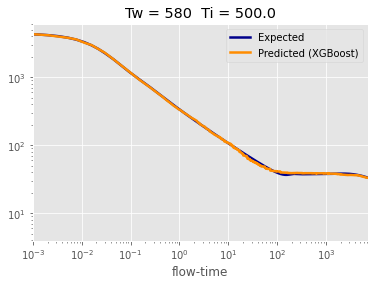

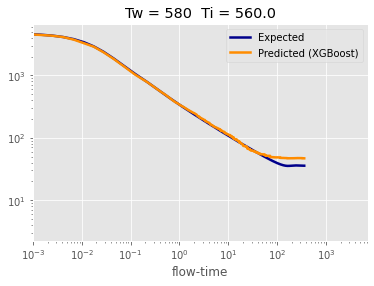

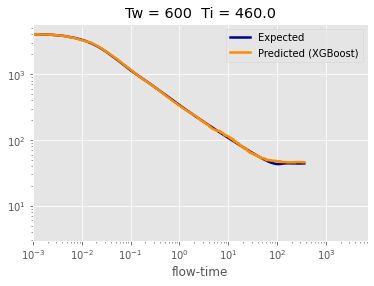

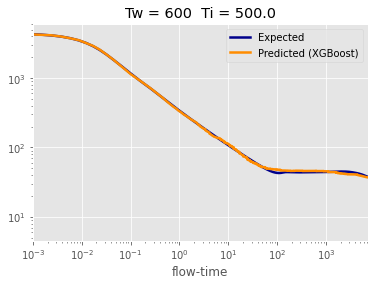

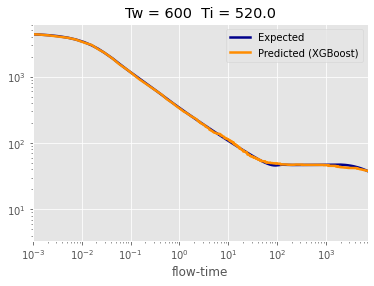

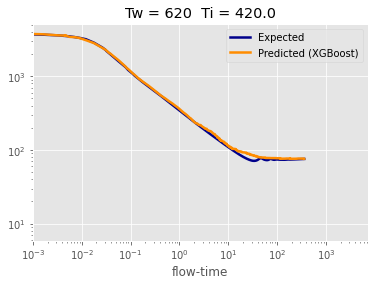

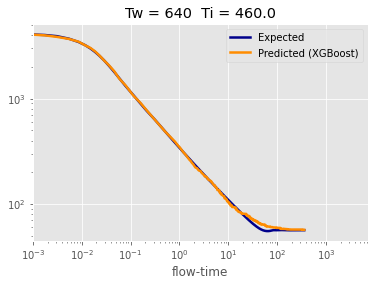

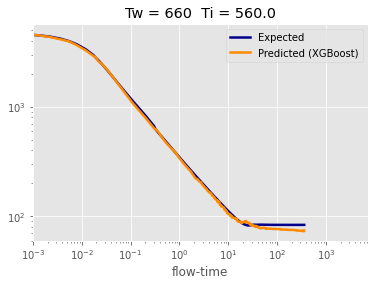

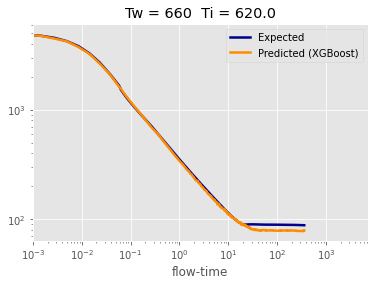

In [12]:
if plot:
    plot_test_results(h_df, model_type, target='h')

In [13]:
# Train the NN model for t <= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220708-22'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1
t_max=360
truncated=True

In [14]:
train_model = False

if train_model:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_max=t_max)

In [15]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

In [16]:
load_model_and_addendum = True

if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

2022-07-11 10:12:52.787140: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
t_max = -1 # If building final model, set t_max to -1 here
T_results = validate_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

2022-07-11 10:12:59.655850: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


RMSE: 118.8024065, R2: -4.9438996


In [18]:
T_df = T_results['val_df']

In [19]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

In [22]:
if plot:
    avg_error = plot_average_error(T_df, target=target, t_max=t_max)

In [23]:
if plot:
    (T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

In [24]:
if plot:
    plot_test_results(T_df, model_type, target='Tavg')

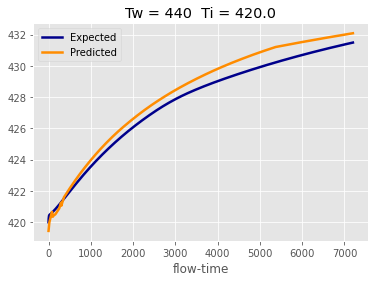

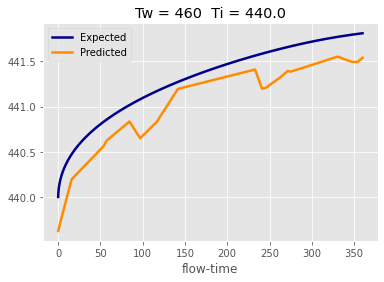

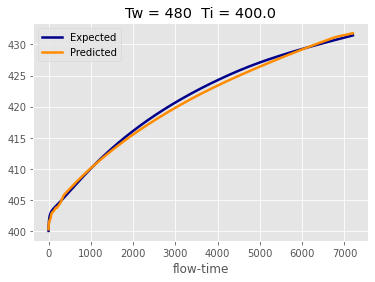

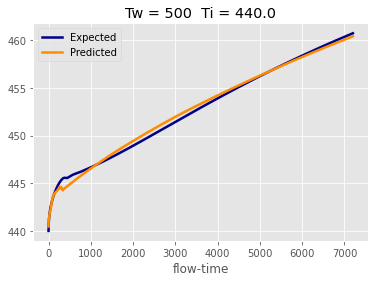

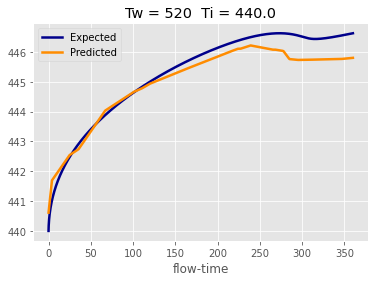

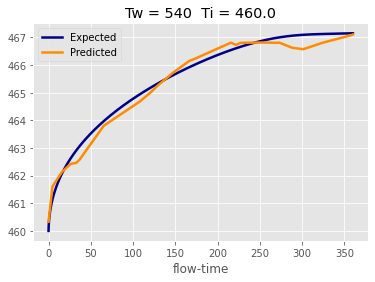

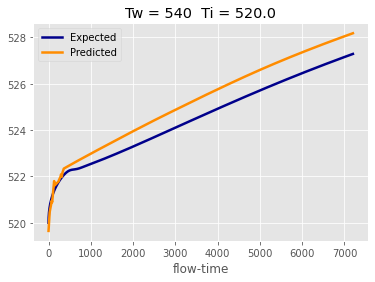

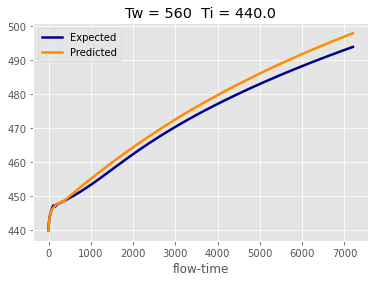

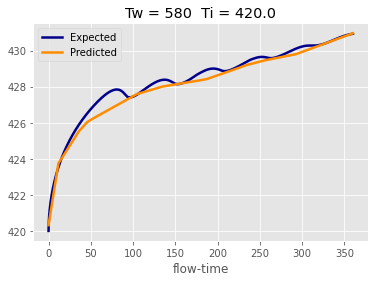

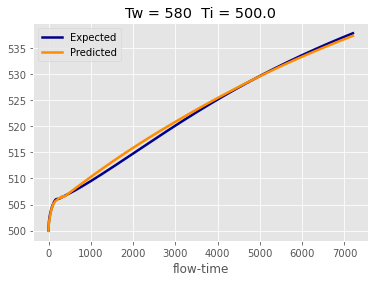

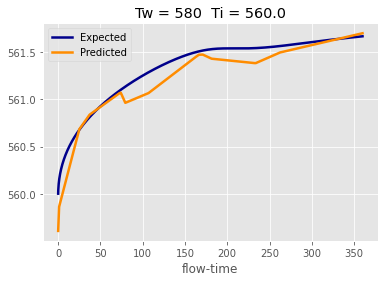

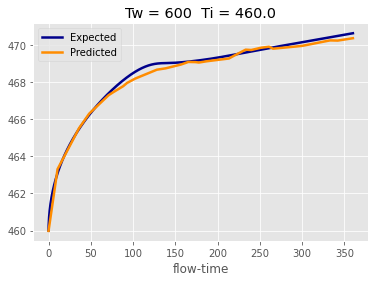

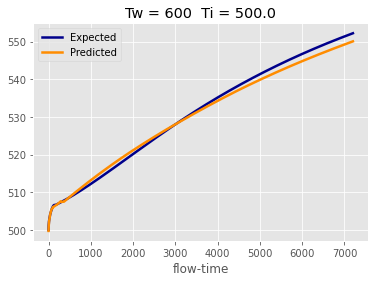

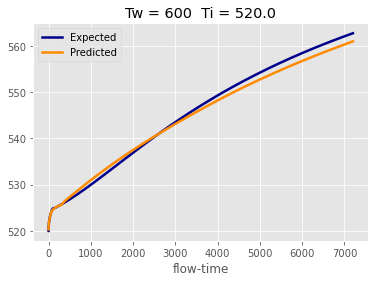

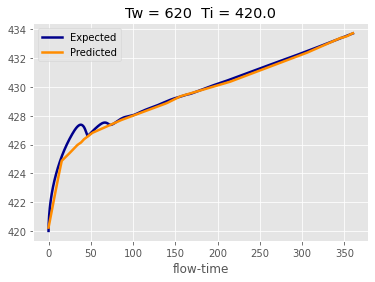

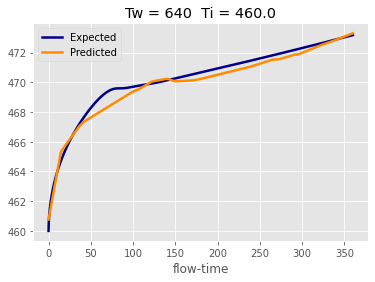

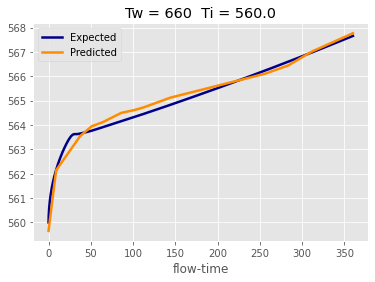

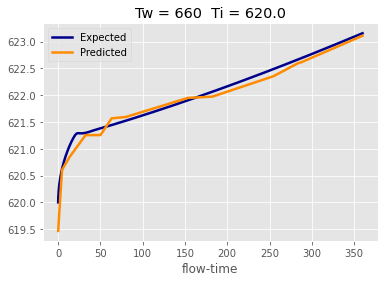

In [20]:
rmse, r2 = get_T_from_h_results(h_df, plot=True)

In [21]:
print(rmse)

1.1864773271744387


In [22]:
print(r2)

0.9994071567504565
